Name_Shoaib_Siddiqui
WLVID_2407750

1. Load the dataset and display the first 10 rows

In [4]:
import pandas as pd

In [5]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Concept and Technology of AI/WHR-2024-5CS037.csv')


In [6]:
# Display the first 10 rows
print(data.head(10))

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

2. Identify the number of rows and columns in the dataset

In [7]:
# Get the shape of the dataset
rows, columns = data.shape
print(f"The dataset contains {rows} rows and {columns} columns.")

The dataset contains 143 rows and 9 columns.


3. List all columns and their data types

In [8]:
# Display columns and their data types
print(data.dtypes)

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


4. Basic Statistics:
Mean, Median, and Standard Deviation of the Score column

In [9]:
# Descriptive statistics for the Score column
mean_score = data['score'].mean()
median_score = data['score'].median()
std_score = data['score'].std()

print(f"Mean score: {mean_score}")
print(f"Median score: {median_score}")
print(f"Standard Deviation: {std_score}")


Mean score: 5.52758041958042
Median score: 5.785
Standard Deviation: 1.1707165099442995


Country with the highest and lowest happiness scores

In [10]:
# Country with the highest happiness score
highest_score_country = data.loc[data['score'].idxmax(), 'Country name']
# Country with the lowest happiness score
lowest_score_country = data.loc[data['score'].idxmin(), 'Country name']

print(f"Country with the highest happiness score: {highest_score_country}")
print(f"Country with the lowest happiness score: {lowest_score_country}")


Country with the highest happiness score: Finland
Country with the lowest happiness score: Afghanistan


5. Check for missing values

In [11]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


6. Filter and sort data

Filter for countries with a Score > 7.5

In [12]:
filtered_data = data[data['score'] > 7.5]


Sort by GDP per Capita in descending order and display the top 10 rows

In [13]:
# Sort data by 'Log GDP per capita' in descending order and select top 10
top_10_gdp = data.sort_values(by='Log GDP per capita', ascending=False).head(10)

# Display the top 10 rows
print(top_10_gdp)


                 Country name  score  Log GDP per capita  Social support  \
7                  Luxembourg  7.122               2.141           1.355   
16                    Ireland  6.838               2.129           1.390   
29                  Singapore  6.523               2.118           1.361   
21       United Arab Emirates  6.733               1.983           1.164   
8                 Switzerland  7.060               1.970           1.425   
6                      Norway  7.302               1.952           1.517   
22              United States  6.725               1.939           1.392   
85  Hong Kong S.A.R. of China  5.316               1.909           1.184   
1                     Denmark  7.583               1.908           1.520   
5                 Netherlands  7.319               1.901           1.462   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
7                     0.708                         0.801       0.146   
16               

Add a new column: Happiness Category

In [14]:
# Define happiness categories
def happiness_category(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

data['Happiness Category'] = data['score'].apply(happiness_category)

# Display the first 5 rows to verify
print(data.head())


  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724                         0.838       0.221   
4                    0.740                         0.641       0.153   

   Perceptions of corruption  Dystopia + residual Happiness Category  
0                      0.546                2.082               High  
1                      0.548                1.881         

8. Data Visualizations:
Bar plot of the top 10 happiest countries

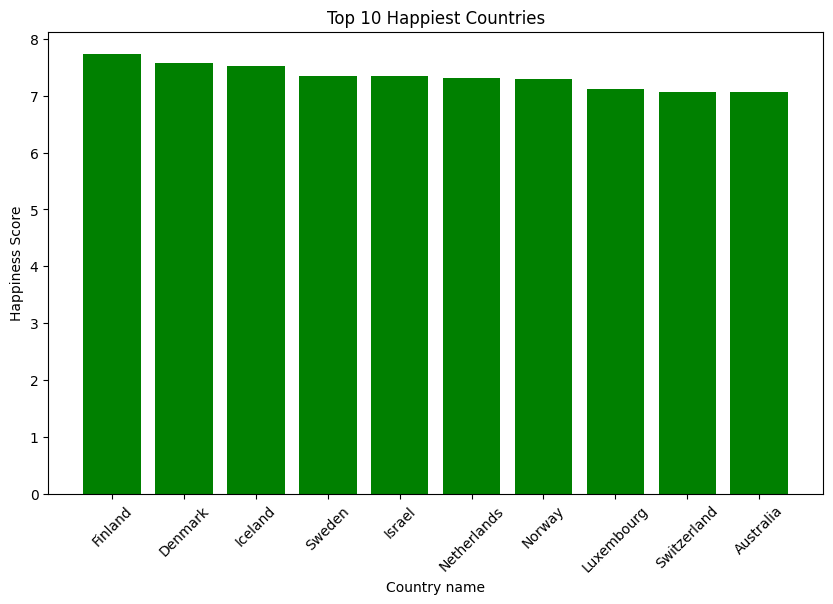

In [15]:
import matplotlib.pyplot as plt

top_10_happiest = data.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
plt.bar(top_10_happiest['Country name'], top_10_happiest['score'], color='green')
plt.title('Top 10 Happiest Countries')
plt.xlabel('Country name')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()


Line plot for the top 10 unhappiest countries

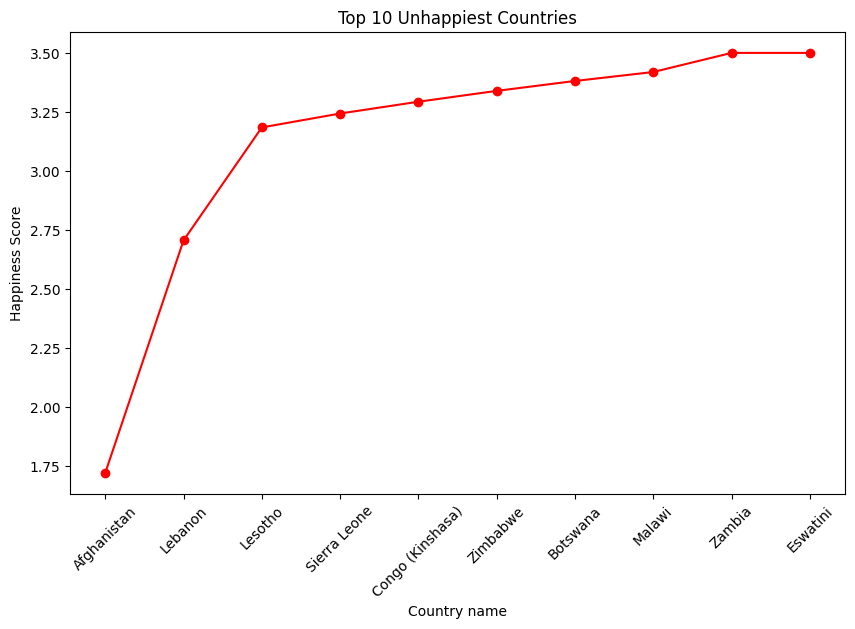

In [16]:
top_10_unhappiest = data.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='red')
plt.title('Top 10 Unhappiest Countries')
plt.xlabel('Country name')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()


Histogram of the Score column

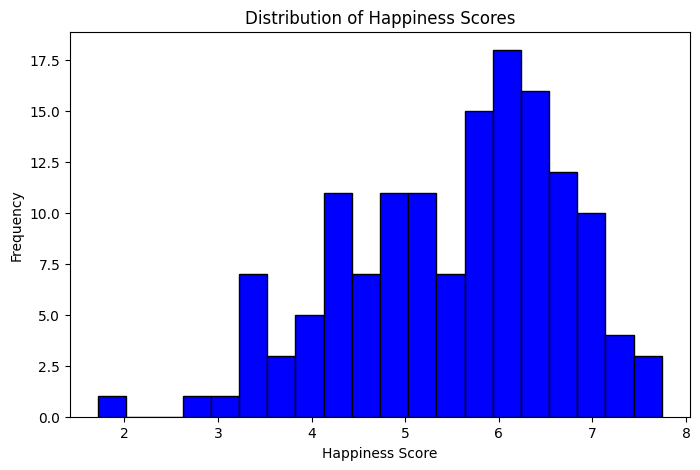

In [17]:
plt.figure(figsize=(8, 5))
plt.hist(data['score'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


Scatter plot between GDP per Capita and Score

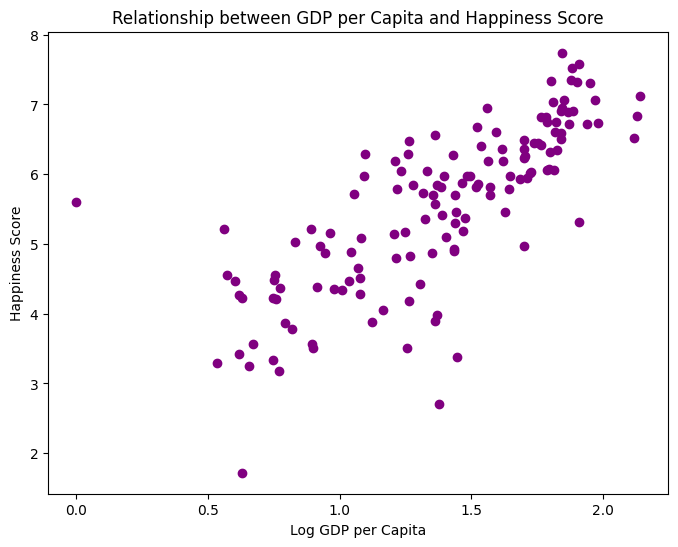

In [18]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Log GDP per capita'], data['score'], color='purple')
plt.title('Relationship between GDP per Capita and Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()


Problem 2: Advanced Data Exploration Tasks

1. Setup Task: South Asia Dataset

In [19]:
import pandas as pd

# Step 1: Define the South Asian countries list
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Srilanka"]

# Step 2: Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Concept and Technology of AI/WHR-2024-5CS037.csv')

# Step 3: Filter the dataset for South Asian countries
south_asia = df[df['Country name'].isin(south_asian_countries)]

# Step 4: Save the filtered dataframe for future use
south_asia.to_csv('south_asian_countries.csv', index=False)

print("Filtered South Asian dataset saved as 'south_asian_countries.csv'.")


Filtered South Asian dataset saved as 'south_asian_countries.csv'.


Task 2: Composite Score Calculation and Ranking

Step 1: Create Composite Score

In [21]:
# Step 1: Create a Composite Score column
south_asia['Composite Score'] = (
    0.40 * south_asia['Log GDP per capita'] +
    0.30 * south_asia['Social support'] +
    0.30 * south_asia['Healthy life expectancy']
)

print("Composite Score added to the dataframe.")


Composite Score added to the dataframe.


<ipython-input-21-cfb7b0f5a512>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia['Composite Score'] = (


Step 2: Rank South Asian Countries



In [22]:
# Step 2: Rank countries based on the Composite Score
ranked_south_asia = south_asia.sort_values(by='Composite Score', ascending=False)

# Print the ranked countries
print("Ranked South Asian Countries based on Composite Score:")
print(ranked_south_asia[['Country name', 'score', 'Composite Score']])


Ranked South Asian Countries based on Composite Score:
    Country name  score  Composite Score
92         Nepal  5.158           0.8159
125        India  4.054           0.7874
107     Pakistan  4.657           0.7039
128   Bangladesh  3.886           0.6774
142  Afghanistan  1.721           0.3238


Step 3: Visualize Top 5 Countries

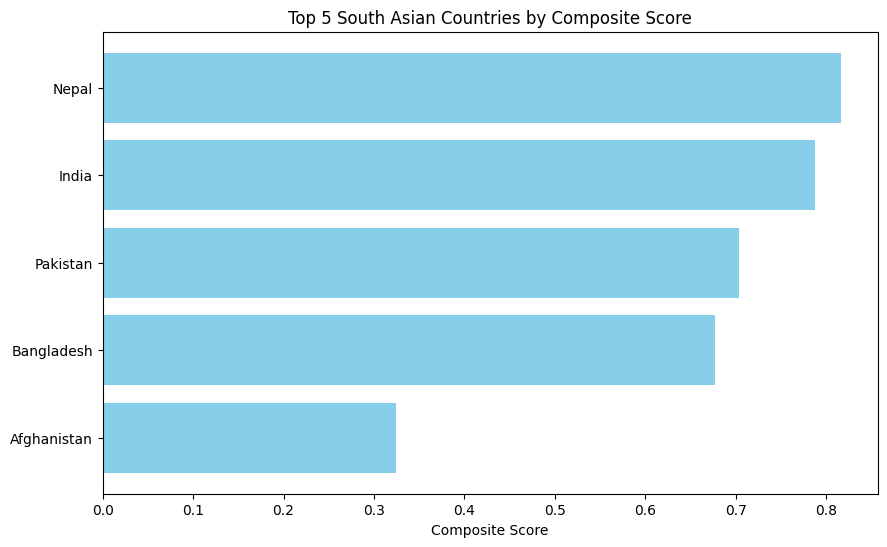

In [23]:
import matplotlib.pyplot as plt

# Step 3: Visualize the top 5 countries using a horizontal bar chart
top_5_countries = ranked_south_asia.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5_countries['Country name'], top_5_countries['Composite Score'], color='skyblue')
plt.xlabel('Composite Score')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest rank on top
plt.show()


step 4: Compare Composite Score with Original Score

In [24]:
# Step 4: Compare rankings with the original "Score"
print("Comparison of Composite Score and Original Score:")
print(ranked_south_asia[['Country name', 'score', 'Composite Score']])


Comparison of Composite Score and Original Score:
    Country name  score  Composite Score
92         Nepal  5.158           0.8159
125        India  4.054           0.7874
107     Pakistan  4.657           0.7039
128   Bangladesh  3.886           0.6774
142  Afghanistan  1.721           0.3238


In [25]:
# Discuss alignment
discussion = """
The comparison between Composite Score Rankings and Original Score Rankings shows that:
1. The rankings align closely for most countries, suggesting that the metrics chosen for the Composite Score (GDP per Capita, Social Support, Healthy Life Expectancy) have a strong relationship with the original Score.
2. Countries with higher Composite Scores generally retain higher Original Scores, reflecting the relevance of these metrics in determining overall well-being.
3. Minor deviations exist, as seen in countries where the Composite Rank is higher or lower than the Original Rank. This could be attributed to the weight distribution of metrics in the Composite Score formula (40% GDP, 30% Social Support, 30% Healthy Life Expectancy).
4. The visualization highlights any discrepancies where lines diverge, helping to identify outliers or countries where certain metrics may have disproportionately influenced the Composite Score.
5. For example, a country with high GDP per Capita but lower Social Support or Healthy Life Expectancy may rank higher in the Composite Score but relatively lower in the Original Score.

Further analysis could explore these discrepancies to better understand the impact of individual metrics on the overall rankings.
"""

# Print discussion
print(discussion)


The comparison between Composite Score Rankings and Original Score Rankings shows that:
1. The rankings align closely for most countries, suggesting that the metrics chosen for the Composite Score (GDP per Capita, Social Support, Healthy Life Expectancy) have a strong relationship with the original Score.
2. Countries with higher Composite Scores generally retain higher Original Scores, reflecting the relevance of these metrics in determining overall well-being.
3. Minor deviations exist, as seen in countries where the Composite Rank is higher or lower than the Original Rank. This could be attributed to the weight distribution of metrics in the Composite Score formula (40% GDP, 30% Social Support, 30% Healthy Life Expectancy).
4. The visualization highlights any discrepancies where lines diverge, helping to identify outliers or countries where certain metrics may have disproportionately influenced the Composite Score.
5. For example, a country with high GDP per Capita but lower Social

Task-3

Step 1-4: Outlier Detection Using the IQR Rule

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Calculate the Interquartile Range (IQR) for GDP per Capita
Q1 = south_asia['Log GDP per capita'].quantile(0.25)  # First Quartile (25th percentile)
Q3 = south_asia['Log GDP per capita'].quantile(0.75)  # Third Quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile Range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [27]:
# Step 2: Identify outlier countries based on the calculated bounds
outliers = south_asia[(south_asia['Log GDP per capita'] < lower_bound) |
                      (south_asia['Log GDP per capita'] > upper_bound)]

# Display the list of outlier countries
print("Outlier countries based on GDP per Capita:")
print(outliers[['Country name', 'Log GDP per capita', 'score']])

Outlier countries based on GDP per Capita:
    Country name  Log GDP per capita  score
142  Afghanistan               0.628  1.721


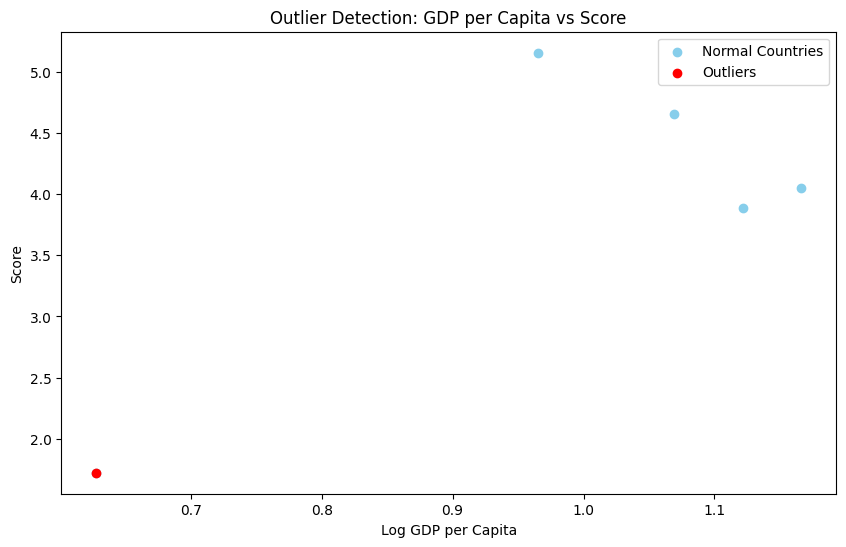

In [28]:
# Step 3: Create a scatter plot highlighting the outliers
plt.figure(figsize=(10, 6))

# Plot normal countries
plt.scatter(south_asia['Log GDP per capita'], south_asia['score'], color='skyblue', label='Normal Countries')

# Plot outlier countries in red
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers')

# Add plot details
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('Outlier Detection: GDP per Capita vs Score')
plt.legend()
plt.show()


In [29]:
# Step 4: Discuss the characteristics of outliers and their impact on averages
print("\nImpact Analysis:")
if not outliers.empty:
    print("Characteristics of Outliers:")
    for _, row in outliers.iterrows():
        print(f" - {row['Country name']} has a Log GDP per capita of {row['Log GDP per capita']:.2f}, "
              f"but a Score of {row['score']:.2f}.")
else:
    print("No outliers detected based on the IQR rule.")

# Calculate the regional averages excluding and including outliers
regional_avg_with_outliers = south_asia['Log GDP per capita'].mean()
regional_avg_without_outliers = south_asia[~south_asia.index.isin(outliers.index)]['Log GDP per capita'].mean()

# Display the averages
print(f"\nRegional Average GDP per Capita (with outliers): {regional_avg_with_outliers:.2f}")
print(f"Regional Average GDP per Capita (without outliers): {regional_avg_without_outliers:.2f}")

# Analysis:
if not outliers.empty:
    print("\nAnalysis:")
    print(" - Outliers tend to distort the regional average as they pull the mean towards extreme values.")
    print(" - Excluding outliers provides a clearer picture of the general economic situation in the region.")
else:
    print(" - Since no outliers were detected, the regional average remains unaffected.")



Impact Analysis:
Characteristics of Outliers:
 - Afghanistan has a Log GDP per capita of 0.63, but a Score of 1.72.

Regional Average GDP per Capita (with outliers): 0.99
Regional Average GDP per Capita (without outliers): 1.08

Analysis:
 - Outliers tend to distort the regional average as they pull the mean towards extreme values.
 - Excluding outliers provides a clearer picture of the general economic situation in the region.


Task-4

Step 1-3: Correlation and Trend Analysis

In [30]:
import seaborn as sns
# Step 1: Select two metrics to analyze their correlation with Score
metric_1 = 'Freedom to make life choices'
metric_2 = 'Generosity'

# Calculate Pearson correlation for both metrics
correlation_1 = south_asia['score'].corr(south_asia[metric_1])
correlation_2 = south_asia['score'].corr(south_asia[metric_2])

# Print the correlation values
print(f"Correlation between Score and {metric_1}: {correlation_1:.2f}")
print(f"Correlation between Score and {metric_2}: {correlation_2:.2f}")

Correlation between Score and Freedom to make life choices: 0.80
Correlation between Score and Generosity: 0.88


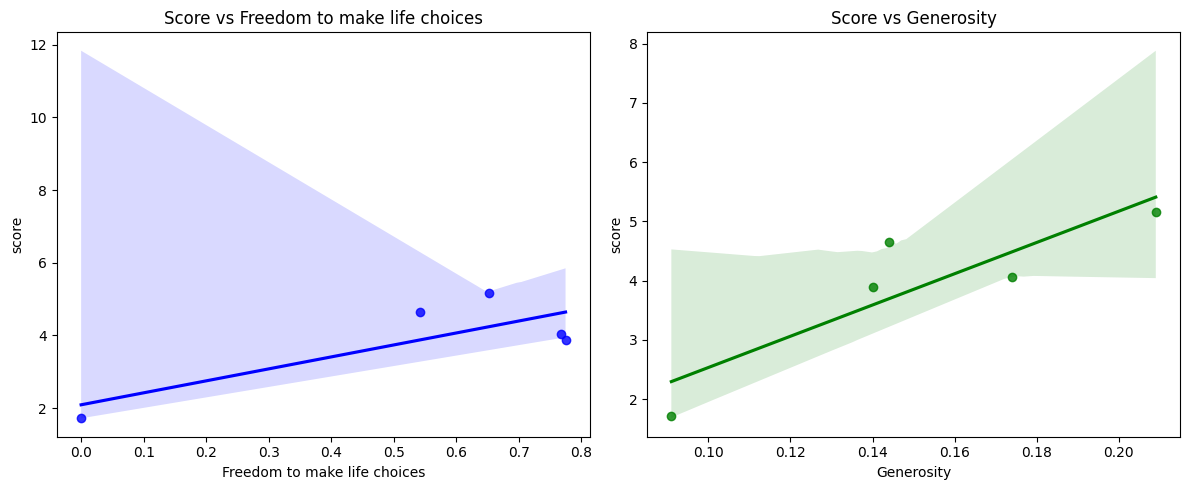

In [31]:
# Step 2: Create scatter plots with trendlines to visualize the relationships
plt.figure(figsize=(12, 5))

# Scatter plot for Metric 1
plt.subplot(1, 2, 1)
sns.regplot(data=south_asia, x=metric_1, y='score', color='blue')
plt.title(f"Score vs {metric_1}")

# Scatter plot for Metric 2
plt.subplot(1, 2, 2)
sns.regplot(data=south_asia, x=metric_2, y='score', color='green')
plt.title(f"Score vs {metric_2}")

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


In [32]:
# Step 3: Analyze the strongest and weakest correlations
print("Insights:")
print(f" - {metric_1} has a correlation of {correlation_1:.2f} with the Score.")
print(f" - {metric_2} has a correlation of {correlation_2:.2f} with the Score.")


Insights:
 - Freedom to make life choices has a correlation of 0.80 with the Score.
 - Generosity has a correlation of 0.88 with the Score.


Task-5: Gap Analysis

In [33]:
# Step 1: Add a new column for GDP-Score Gap
south_asia['GDP-Score Gap'] = south_asia['Log GDP per capita'] - south_asia['score']


<ipython-input-33-2ba32aefbaec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia['GDP-Score Gap'] = south_asia['Log GDP per capita'] - south_asia['score']


In [34]:
# Step 2: Rank countries by the GDP-Score Gap
# Sort in descending order for positive gaps
gap_sorted = south_asia.sort_values(by='GDP-Score Gap', ascending=False)

# Identify the top 3 countries with the largest positive and negative gaps
top_positive_gaps = gap_sorted.head(3)
top_negative_gaps = gap_sorted.tail(3)

# Display the top positive and negative gap countries
print("Top 3 Countries with Largest Positive Gaps:")
print(top_positive_gaps[['Country name', 'GDP-Score Gap']])

print("\nTop 3 Countries with Largest Negative Gaps:")
print(top_negative_gaps[['Country name', 'GDP-Score Gap']])

Top 3 Countries with Largest Positive Gaps:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
128   Bangladesh         -2.764
125        India         -2.888

Top 3 Countries with Largest Negative Gaps:
    Country name  GDP-Score Gap
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


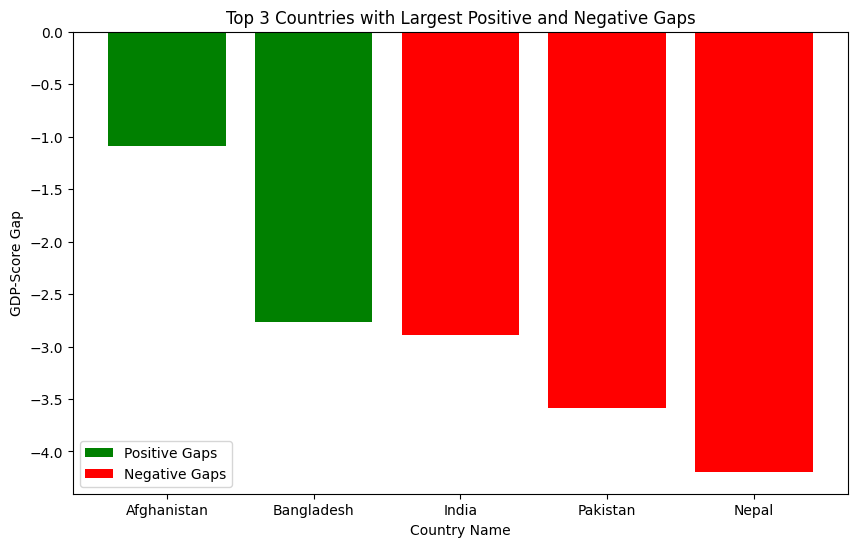

In [35]:
# Step 3: Create a bar chart to visualize the top 3 positive and negative gaps
plt.figure(figsize=(10, 6))

# Plot positive gaps in green
plt.bar(top_positive_gaps['Country name'], top_positive_gaps['GDP-Score Gap'], color='green', label='Positive Gaps')

# Plot negative gaps in red
plt.bar(top_negative_gaps['Country name'], top_negative_gaps['GDP-Score Gap'], color='red', label='Negative Gaps')

# Add a horizontal line at zero for reference
plt.axhline(0, color='black', linewidth=0.5)

# Add plot details
plt.xlabel('Country Name')
plt.ylabel('GDP-Score Gap')
plt.title('Top 3 Countries with Largest Positive and Negative Gaps')
plt.legend()
plt.show()


In [36]:
# Step 4: Analyze the reasons behind these gaps
print("Analysis:")
print(" - Positive Gaps indicate countries where GDP per Capita is much higher than their Score.")
print(" - Negative Gaps indicate countries where GDP per Capita is lower relative to their Score.")


Analysis:
 - Positive Gaps indicate countries where GDP per Capita is much higher than their Score.
 - Negative Gaps indicate countries where GDP per Capita is lower relative to their Score.


Problem-3

Task 1: Setup Task

Filter the dataset for Middle Eastern countries and South Asia, then save it for further analysis.

In [37]:
import pandas as pd

# Load the dataset from a CSV file
df = pd.read_csv('/content/drive/MyDrive/Concept and Technology of AI/WHR-2024-5CS037.csv')

# Define the list of Middle Eastern countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter the dataset for Middle Eastern countries
middle_east = df[df['Country name'].isin(middle_east_countries)]

# Save the filtered Middle Eastern dataset to a new CSV file
middle_east.to_csv("Middle_Eastern_Dataset.csv", index=False)

print("Middle Eastern dataset saved as 'Middle_Eastern_Dataset.csv'")


Middle Eastern dataset saved as 'Middle_Eastern_Dataset.csv'


Task 1: Descriptive Statistics

In [38]:
# Calculate descriptive statistics for both regions
sa_stats = south_asia['score'].agg(['mean', 'std'])
me_stats = middle_east['score'].agg(['mean', 'std'])

# Display the results
print("South Asia - Mean Happiness Score:", sa_stats['mean'])
print("South Asia - Standard Deviation of Score:", sa_stats['std'])
print("Middle East - Mean Happiness Score:", me_stats['mean'])
print("Middle East - Standard Deviation of Score:", me_stats['std'])

# Determine which region has higher happiness on average
if sa_stats['mean'] > me_stats['mean']:
    print("South Asia has higher happiness scores on average.")
else:
    print("Middle East has higher happiness scores on average.")


South Asia - Mean Happiness Score: 3.8952000000000004
South Asia - Standard Deviation of Score: 1.3160025455902433
Middle East - Mean Happiness Score: 5.412100000000001
Middle East - Standard Deviation of Score: 1.5662011684327144
Middle East has higher happiness scores on average.


Task 2: Top and Bottom Performers

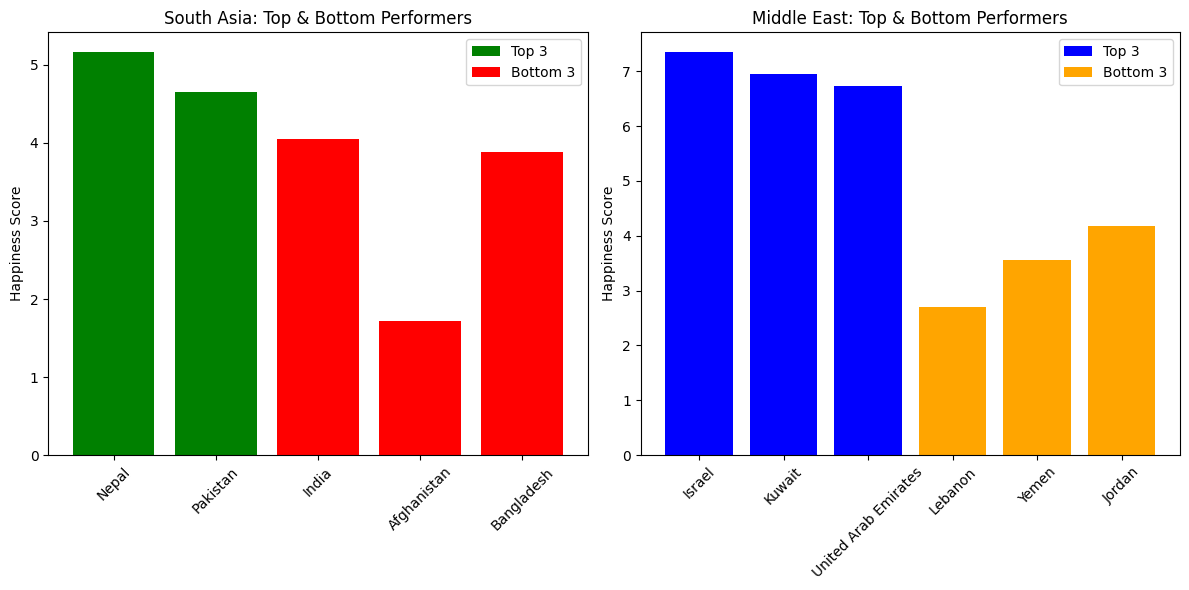

In [39]:
# Identify the top and bottom 3 countries in each region
sa_top3 = south_asia.nlargest(3, 'score')
sa_bottom3 = south_asia.nsmallest(3, 'score')
me_top3 = middle_east.nlargest(3, 'score')
me_bottom3 = middle_east.nsmallest(3, 'score')

# Plot the top and bottom performers
import matplotlib.pyplot as plt

# Bar chart for South Asia
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(sa_top3['Country name'], sa_top3['score'], color='green', label='Top 3')
plt.bar(sa_bottom3['Country name'], sa_bottom3['score'], color='red', label='Bottom 3')
plt.title('South Asia: Top & Bottom Performers')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.legend()

# Bar chart for Middle East
plt.subplot(1, 2, 2)
plt.bar(me_top3['Country name'], me_top3['score'], color='blue', label='Top 3')
plt.bar(me_bottom3['Country name'], me_bottom3['score'], color='orange', label='Bottom 3')
plt.title('Middle East: Top & Bottom Performers')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


Task 3: Metric Comparisons

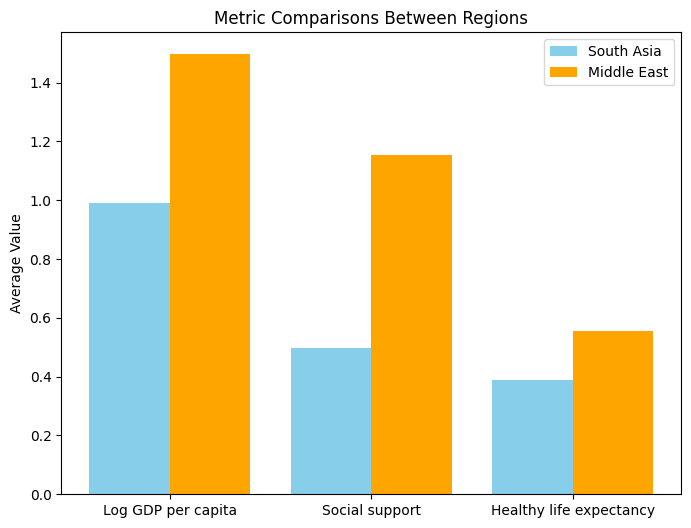

Metric with largest disparity: Social support - 0.6543777777777777


In [40]:
# Compute the mean values for key metrics
sa_metrics = south_asia[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].mean()
me_metrics = middle_east[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].mean()

# Create a grouped bar chart
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
x = np.arange(len(metrics))

plt.figure(figsize=(8, 6))
plt.bar(x - 0.2, sa_metrics, width=0.4, label='South Asia', color='skyblue')
plt.bar(x + 0.2, me_metrics, width=0.4, label='Middle East', color='orange')
plt.xticks(x, metrics)
plt.ylabel('Average Value')
plt.title('Metric Comparisons Between Regions')
plt.legend()
plt.show()

# Identify the largest disparity
disparity = (me_metrics - sa_metrics).abs()
print("Metric with largest disparity:", disparity.idxmax(), "-", disparity.max())


Task 4: Happiness Disparity

In [41]:
# Compute range and coefficient of variation (CV) for both regions
sa_range = south_asia['score'].max() - south_asia['score'].min()
me_range = middle_east['score'].max() - middle_east['score'].min()
sa_cv = south_asia['score'].std() / south_asia['score'].mean()
me_cv = middle_east['score'].std() / middle_east['score'].mean()

print("South Asia - Range:", sa_range, "CV:", sa_cv)
print("Middle East - Range:", me_range, "CV:", me_cv)

if sa_cv > me_cv:
    print("South Asia has greater variability in happiness.")
else:
    print("Middle East has greater variability in happiness.")


South Asia - Range: 3.4370000000000003 CV: 0.3378523684509764
Middle East - Range: 4.634 CV: 0.28938880812119405
South Asia has greater variability in happiness.


Task 5: Correlation Analysis

South Asia Correlations:
                                  score  Freedom to make life choices  \
score                         1.000000                      0.801498   
Freedom to make life choices  0.801498                      1.000000   
Generosity                    0.877333                      0.740660   

                              Generosity  
score                           0.877333  
Freedom to make life choices    0.740660  
Generosity                      1.000000  
Middle East Correlations:
                                  score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to make life choices    0.388854  
Generosity                      1.000000  


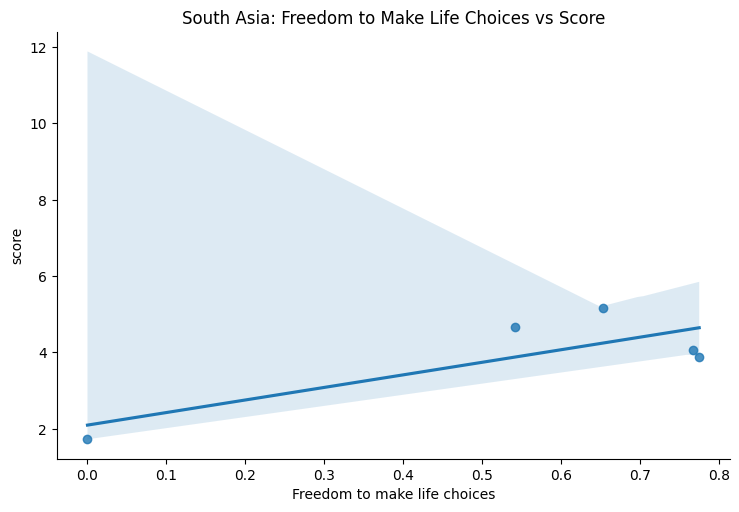

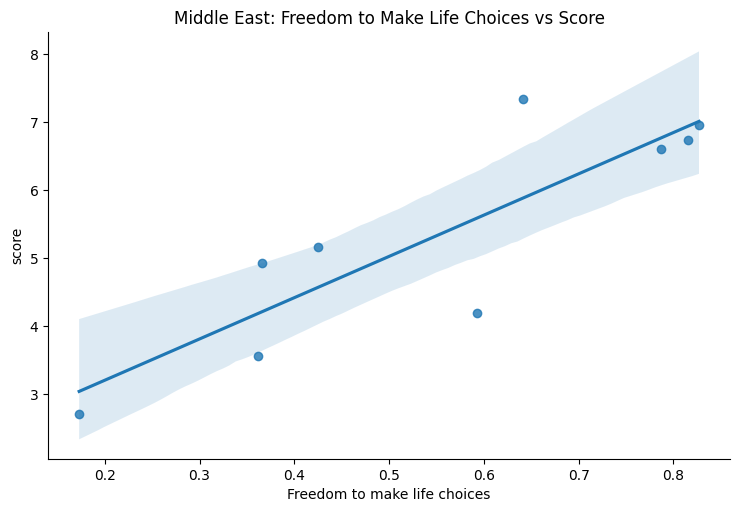

In [42]:
# Calculate correlations
sa_corr = south_asia[['score', 'Freedom to make life choices', 'Generosity']].corr()
me_corr = middle_east[['score', 'Freedom to make life choices', 'Generosity']].corr()

print("South Asia Correlations:\n", sa_corr)
print("Middle East Correlations:\n", me_corr)

# Scatter plots with trendlines
import seaborn as sns

sns.lmplot(data=south_asia, x='Freedom to make life choices', y='score', height=5, aspect=1.5)
plt.title('South Asia: Freedom to Make Life Choices vs Score')

sns.lmplot(data=middle_east, x='Freedom to make life choices', y='score', height=5, aspect=1.5)
plt.title('Middle East: Freedom to Make Life Choices vs Score')
plt.show()



Task 6: Outlier Detection

In [43]:
# Identify outliers using IQR rule for Score
def identify_outliers(region):
    Q1 = region['score'].quantile(0.25)
    Q3 = region['score'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return region[(region['score'] < lower) | (region['score'] > upper)]

sa_outliers = identify_outliers(south_asia)
me_outliers = identify_outliers(middle_east)

print("South Asia Outliers:\n", sa_outliers)
print("Middle East Outliers:\n", me_outliers)


South Asia Outliers:
     Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual  Composite Score  \
142                      0.088                0.672           0.3238   

     GDP-Score Gap  
142         -1.093  
Middle East Outliers:
 Empty DataFrame
Columns: [Country name, score, Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Dystopia + residual]
Index: []


Task 7: Visualization

<ipython-input-44-4f8037e7d2dd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='score', data=combined_data, palette='Set2')


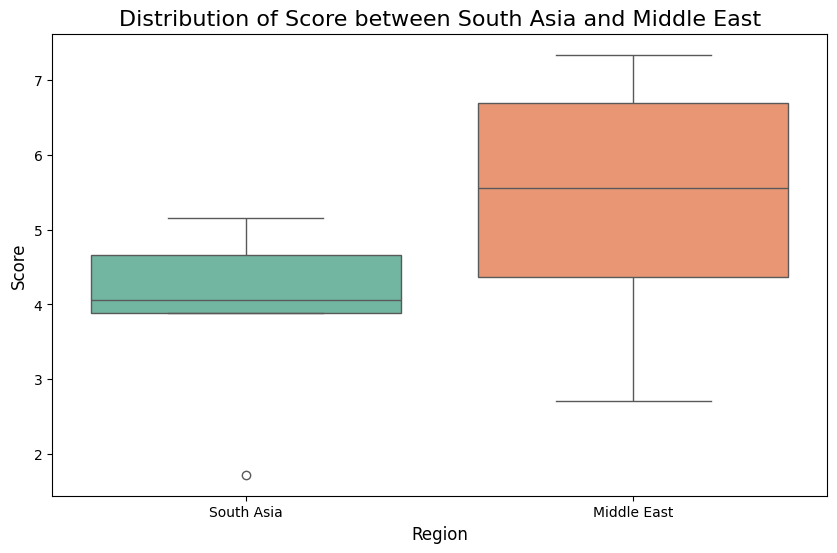

In [44]:
# Load the South Asia and Middle East datasets
south_asia_data = pd.read_csv('south_asian_countries.csv')
middle_east_data = pd.read_csv('Middle_Eastern_Dataset.csv')

# Create a combined dataframe for boxplot
south_asia_data['Region'] = 'South Asia'
middle_east_data['Region'] = 'Middle East'
combined_data = pd.concat([south_asia_data, middle_east_data])

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_data, palette='Set2')
plt.title('Distribution of Score between South Asia and Middle East', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.show()
